In [1]:
import numpy as np
#import scipy as sc
from observables import observables
from operators   import operator
from hamiltonian import hamiltonian
from k_space     import k_space
from z2_wcc import z2_wcc
#import matplotlib.pyplot as plt
#import time
#import matplotlib
from triang_ham import p_triang_ham
#import copy
#import pickle

In [2]:
def model_par(plot_type):
    lambda_soc =  0.15
    lambda_mir_triv = 0.1
    lambda_isb_triv = 0.04
    V_si       =  0.7  # 1.4 In p sigma bond hybridization / positive valued
    V_pi       = -0.15 # 0.4 In p pi bond hybridization    / negative valued
    V_pz       = -0.25
    E_pxy      =  0.0
    E_pz       = -0.7 #Added to stabilize global gap
    if plot_type == "free":
        lambda_mir = 0.00
        lambda_isb = 0.00
        lambda_soc *=2
    elif plot_type == "free+isb+mir":
        lambda_mir = lambda_mir_triv/6
        lambda_isb = lambda_isb_triv/3
        lambda_soc *= 1
    elif plot_type == "isb+mir":
        lambda_mir = lambda_mir_triv
        lambda_isb = lambda_isb_triv
        lambda_soc *= 0.5
    elif plot_type == "free+mir":
        lambda_mir = lambda_mir_triv
        lambda_isb = lambda_isb_triv/3

    return V_si,V_pi,V_pz,E_pxy,E_pz,lambda_soc,lambda_mir,lambda_isb




# Band structure

In [3]:
ops  = ['L','S']
models = ['free','free+isb+mir','isb+mir','free+mir',]
spin = True
for model in models:
    pref = model+'_'
    V_si,V_pi,V_pz,E_pxy,E_pz,l_soc,l_mir,l_isb = model_par(model)
    Ham = p_triang_ham(V_si,V_pi,V_pz,E_pxy,E_pz,l_soc,l_mir,l_isb,spin)
    ktype     = "path"
    kbasis    = "red"
    vecs = np.array([[-1/3,2/3,0],[1/3,1/3,0],[0.5,0,0],[0,0,0],[-1/3,2/3,0],[1/3,1/3,0]])
    npoints = 250
    K_space_bands = k_space(ktype,kbasis,vecs,Ham.bra_vec,npoints)
    bands = observables(Ham,K_space_bands,ops,PREFIX=pref)
    bands.calculate_ops()

Fermi energy: -0.893
gap         :  0.560
Initializing k-independent operator L.
Initializing k-independent operator S.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Time for running H(k) FT: 0.0010900497436523438
Time for diagonalizing H(k): 0.007420063018798828
Time for calculating expectation value of operator L: 0.009764909744262695
Time for calculating expectation value of operator S: 0.01168203353881836
Shifting eigenvalues w.r.t. Fermi level...
Running post-processing for operator L.
Running post-processing for operator S.
Writing eigenvalues output.
Writing output for operator L.
Writing output for operator S.
Fermi energy: -0.860
gap         :  0.109
Initializing k-independent operator L.
Initializing k-independent operator S.
Calculating operators on the given k-space...
Diagonalizing all k-points in parallel.
Time for running H(k) FT: 0.0009179115295410156
Time for diagonalizing H(k): 0.010149002075195312
Time for calculating expectati

# Calculation of the $Z_2$ invatiant

free+isb+mir
Fermi energy: -0.860
gap         :  0.109
Calculating Z_2 invariant for Gamma-plane...
Z_2=0
Calculating Z_2 invariant for BZ-surface plane...
Z_2=0
isb+mir
Fermi energy: -0.832
gap         :  0.251
Calculating Z_2 invariant for Gamma-plane...
Z_2=0
Calculating Z_2 invariant for BZ-surface plane...
Z_2=0
free+mir
Fermi energy: -0.851
gap         :  0.200
Calculating Z_2 invariant for Gamma-plane...
Jump at pump:92
Z_2=1
Calculating Z_2 invariant for BZ-surface plane...
Jump at pump:92
Z_2=1


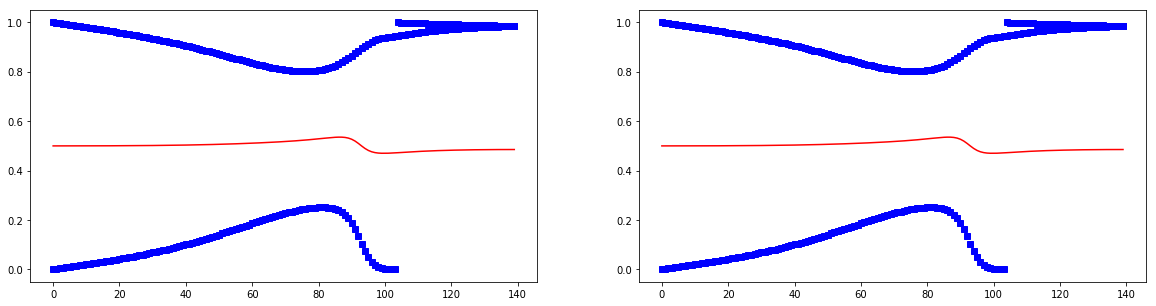

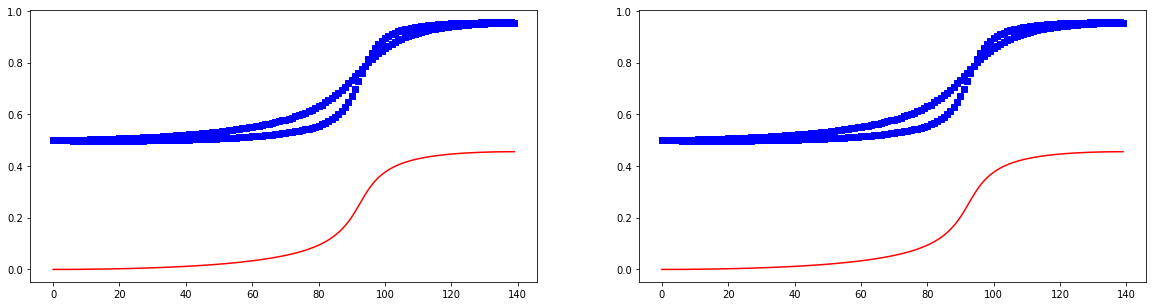

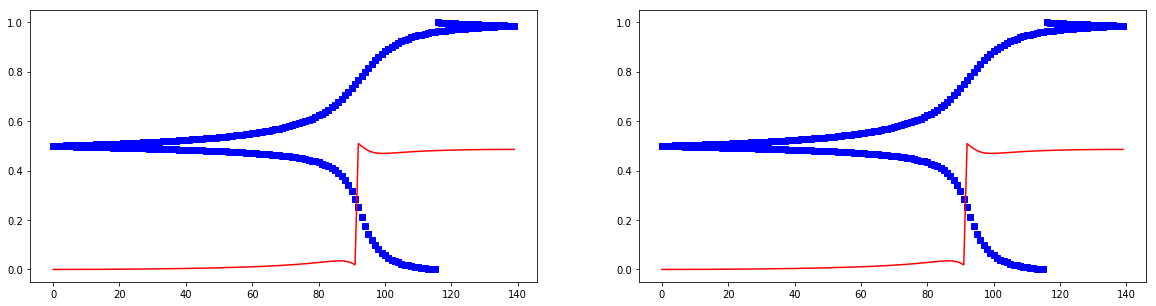

In [7]:
models = ['free+isb+mir','isb+mir','free+mir']

spin = True
n_pump = np.array([140,140])
normal = 3
Z2 = True
if Z2 == True:
    for model in models:
        print(model)
        V_si,V_pi,V_pz,E_pxy,E_pz,l_soc,l_mir,l_isb = model_par(model)
        ham = p_triang_ham(V_si,V_pi,V_pz,E_pxy,E_pz,l_soc,l_mir,l_isb,spin,FULL=False)
        z2 = z2_wcc(ham,n_pump,normal)
        z2.plot_wcc()

# $H(k)$ on arbitrary momentum array
$k$ musst be given in reduced coordinates, last dimension contains the three dimensional momentum vector

In [8]:
k_arb = np.random.rand(6,5,1,3)#last is momentum, takes an arbitrary shape (path,2d,3d grid etc.)
hk = ham.hk(k_arb)